<a href="https://colab.research.google.com/github/greapis/Python_practice/blob/main/Isuan_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

print(tf.__version__)
print(np.__version__)

2.17.0
1.26.4


In [2]:
# xData = [1, 2, 3, 4, 5, 6, 7]
# yData = [25,000,  55,000, 75,000, 110,000, 128,000, 155,000, 180,000]

# W = tf.Variable(tf.random.uniform([1], -100, 100))
# b = tf.Variable(tf.random.uniform([1], -100, 100))
# X = xData = tf.constant(xData, dtype=tf.float32)
# Y = yData = tf.constant(yData, dtype=tf.float32)
# H = W * X + b

In [3]:
# cost = tf.reduce_mean(tf.square(H - Y))
# a = tf.Variable(0.01)
# optimizer = tf.train.GradientDescentOptimizer(a)
# train = optimizer.minimize(cost)
# init = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init)

In [4]:
# for i in range(5001):
#   sess.run(train, feed_dict={X: xData, Y: yData})
#   if i % 500 == 0:
#     print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
# print (sess.run(H, feed_dict={X: [8]}))

In [5]:
import tensorflow as tf

# 데이터 준비
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]  # Corrected yData

# 변수 초기화
W = tf.Variable(tf.random.uniform([1], -100, 100))
b = tf.Variable(tf.random.uniform([1], -100, 100))

In [6]:
# 모델 정의
def model(X):
  # Convert X to float32 before multiplication
  return W * tf.cast(X, dtype=tf.float32) + b

# 손실 함수 정의
def compute_loss(Y_pred, Y_true):
  return tf.reduce_mean(tf.square(Y_pred - Y_true))

# 옵티마이저 정의
optimizer = tf.optimizers.SGD(learning_rate = 0.01)

In [7]:
#  학습 함수 정의
def train_step(X, Y):
  with tf.GradientTape() as tape:
    Y_pred = model(X)
    # Cast Y to float32 before calculating loss
    loss = compute_loss(Y_pred, tf.cast(Y, dtype=tf.float32))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))
  return loss

#  데이터셋 준비
dataset = tf.data.Dataset.from_tensor_slices((xData, yData)).batch(len(xData)) # Now xData and yData have the same length

In [8]:
# 학습
for epoch in range(1001):
  for X_batch, Y_batch in dataset:
    loss = train_step(X_batch, Y_batch)
  if epoch % 100 ==0:
    print(f'Epoch {epoch}: Loss = {loss.numpy()}, W = {W.numpy()}, b = {b.numpy()}')

Epoch 0: Loss = 13447396352.0, W = [10369.145], b = [2112.2478]
Epoch 100: Loss = 9855761.0, W = [25145.479], b = [3891.5637]
Epoch 200: Loss = 9198730.0, W = [25304.488], b = [3104.159]
Epoch 300: Loss = 8894642.0, W = [25412.662], b = [2568.4836]
Epoch 400: Loss = 8753903.0, W = [25486.254], b = [2204.061]
Epoch 500: Loss = 8688771.0, W = [25536.318], b = [1956.1431]
Epoch 600: Loss = 8658627.0, W = [25570.377], b = [1787.4818]
Epoch 700: Loss = 8644674.0, W = [25593.549], b = [1672.7394]
Epoch 800: Loss = 8638215.0, W = [25609.312], b = [1594.6798]
Epoch 900: Loss = 8635224.0, W = [25620.037], b = [1541.5756]
Epoch 1000: Loss = 8633844.0, W = [25627.334], b = [1505.4476]


In [9]:
import tensorflow as tf

a = tf.constant(1)
b = tf.constant(2)

c = tf.add(a, b)
# sess = tf.Session()
# sess.run(c)

c

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [10]:
import tensorflow as tf

a = tf.Variable(5)
b = tf.Variable(3)

c = tf.multiply(a, b)
# init = tf.global_variables_initializer()

print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [11]:
import tensorflow as tf

input_data = [1, 2, 3, 4, 5]

# x = tf.placeholder(dtype=tf.float32)
x = tf.constant(input_data, dtype=tf.float32)
y = x + 5

# sess = tf.Session()
# sess.run(y, feed_dict={x: input})

# print(y)

print(y.numpy())

[ 6.  7.  8.  9. 10.]


In [12]:
import tensorflow as tf
import numpy as np

mathscore = [85, 99, 84, 97, 92]
englishscore = [59, 80, 84, 68, 77]

a = tf.constant(mathscore, dtype=tf.float32)
b = tf.constant(englishscore, dtype=tf.float32)

# a = tf.placeholder(dtype=tf.float32)
# b = tf.placeholder(dtype=tf.float32)

y = (a + b) / 2

# sess = tf.Session()
# sess.run(y, feed_dict={a: mathscore, b: englishscore})

print(y.numpy())

[72.  89.5 84.  82.5 84.5]


In [13]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [14]:
df = pd.DataFrame(columns=['x', 'y'])

In [15]:
df.loc[0] = [2, 3]
df.loc[1] = [2, 1]
df.loc[2] = [4, 3]
df.loc[3] = [5, 2]
df.loc[4] = [6, 4]
df.loc[5] = [7, 5]
df.loc[6] = [6, 6]
df.loc[7] = [5, 7]
df.loc[8] = [4, 6]
df.loc[9] = [3, 5]
df.loc[10] = [2, 4]
df.loc[11] = [10, 15]
df.loc[12] = [12, 16]
df.loc[13] = [14, 17]
df.loc[14] = [15, 16]
df.loc[15] = [16, 15]
df.loc[16] = [17, 14]
df.loc[17] = [18, 13]
df.loc[18] = [19, 12]
df.loc[19] = [20, 11]
df.loc[20] = [21, 10]

In [16]:
df.head(10)

,x,y
0,2,3
1,2,1
2,4,3
3,5,2
4,6,4
5,7,5
6,6,6
7,5,7
8,4,6
9,3,5


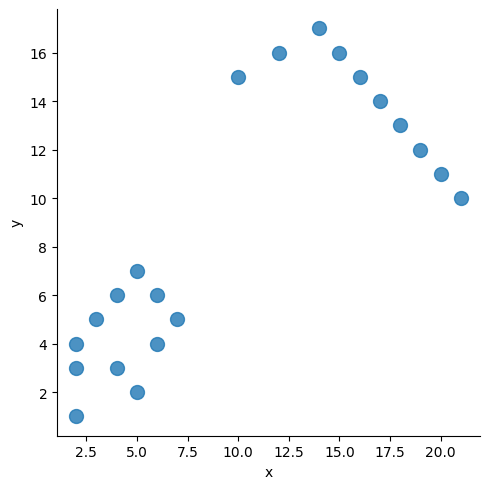

In [17]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100})

Text(33.25000000000001, 0.5, 'y')

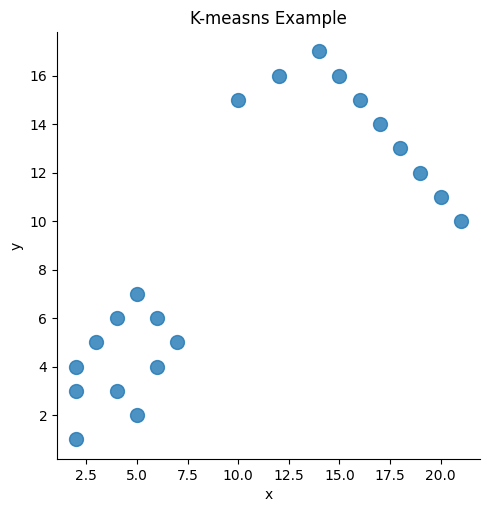

In [18]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-measns Example')
plt.xlabel('x')
plt.ylabel('y')

In [19]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)
kmeans.cluster_centers_

array([[ 5.6,  5.6],
       [14. , 15.5],
       [19.5, 11.5],
       [ 3. ,  3. ]])

In [20]:
kmeans.labels_

array([3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
      dtype=int32)

In [21]:
df['cluster'] = kmeans.labels_
df.head(10)

,x,y,cluster
0,2,3,3
1,2,1,3
2,4,3,3
3,5,2,3
4,6,4,0
5,7,5,0
6,6,6,0
7,5,7,0
8,4,6,0
9,3,5,3


Text(36.30377083333334, 0.5, 'y')

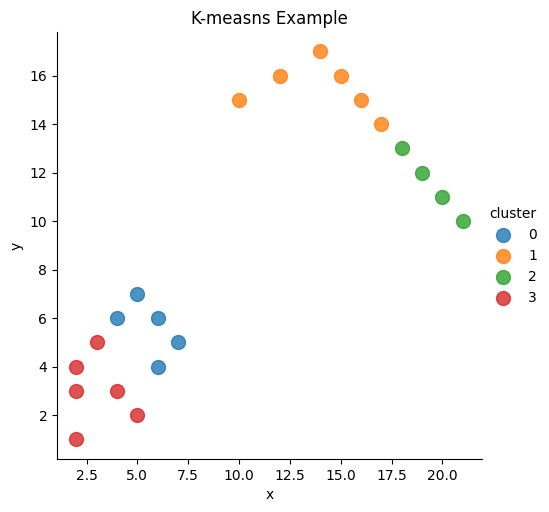

In [22]:
sb.lmplot(x='x', y='y', data=df, fit_reg=False, scatter_kws={"s": 100}, hue='cluster')
plt.title('K-measns Example')
plt.xlabel('x')
plt.ylabel('y')

In [23]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv
import pandas as pd
import os

# 배추가격 예측 시계열 모델

# model = tf.global_variables_initializer()
# current_directory = os.getcwd()

# file_path = os.path.join(current_directory, 'price data.csv')

# data = pd.read_csv('price data.csv', sep=',')

# xy = np.array(data, dtype=np.float32)

In [24]:
# 간단한 수식 산출 및 예측 값 만들기

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras


model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=200)

# print(model.predict([10.0]))
print(model.predict(np.array([10.0])))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step - loss: 6.6177
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 5.3940
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 4.4275
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.6632
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.0583
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.5787
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.1979
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 1.8948
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.6529
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.4593
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 1.3037
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.1781
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.0761
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9928
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.9243
Epoch 16/200
1/1 ━━━━━━━━

In [25]:
# fashin MNIST Practice

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])


mnist = tf.keras.datasets.mnist
(training_images, training_labels),  (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'Adam',
               loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs =5)


# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss'<0.4)):
#       print("\nLoss is low so cancelling training!")
#       self.model.stop_training = True



# Gemini Suggestion
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Fix: Correct the syntax for accessing 'loss' from logs
        if logs.get('loss', float('inf')) < 0.4:  # Get 'loss' and compare it to 0.4
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = tf.nn.relu),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
 ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - loss: 0.3379
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.0849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0514
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0255
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.5900
Epoch 2/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3676
Loss is low so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.3676


In [33]:
# 반복문 "for문", "while문"


names = ['Bob', 'Jessica', 'Mary']
for name in names:
  print(name)


coffees = ['Americano', 'Latte', 'Cappuccino']
for coffee in coffees:
  print(coffee)


for i in range(10):
  print(i+1, "minutes")

for j in range(12):
  print(j+1, "Month")


Bob
Jessica
Mary
Americano
Latte
Cappuccino
1 minutes
2 minutes
3 minutes
4 minutes
5 minutes
6 minutes
7 minutes
8 minutes
9 minutes
10 minutes
1 Month
2 Month
3 Month
4 Month
5 Month
6 Month
7 Month
8 Month
9 Month
10 Month
11 Month
12 Month


In [34]:
# 반복문 "for문", "while문" 확장

names = ['Bob', 'Jessica', 'Mary']

for name in names:
  if name == 'Bob':
    print(name + "is top champion")
  elif name == 'Jessica':
    print(name + "is jungle Champion")
  elif name == 'Mary':
    print(name + "is onedeal Champion")

Bobis top champion
Jessicais jungle Champion
Maryis onedeal Champion


In [41]:
# range details

i = range(1, 10, 2)
print(i)
# range(strat_number, End_number+1, stage)

for i in range(1, 11):
  print(i, "Pages")

range(1, 10, 2)
1 Pages
2 Pages
3 Pages
4 Pages
5 Pages
6 Pages
7 Pages
8 Pages
9 Pages
10 Pages


In [42]:
# While 반복문

count = 0
while count < 5:
  print(count)
  count = count + 1

0
1
2
3
4
